In [13]:
from __future__ import print_function
import datetime
import numpy as np
import yfinance as yf
import pandas as pd
import sklearn.cluster

# 1. Define date range for fetching data
start = datetime.datetime(2011, 1, 1)
end = datetime.datetime(2012, 1, 1)

# Dow Jones symbols
symbols = ["AA", "AXP", "BA", "BAC", "CAT",
           "CSCO", "CVX", "DD", "DIS", "GE", "HD",
           "HPQ", "IBM", "INTC", "JNJ", "JPM",
           "KO", "MCD", "MMM", "MRK", "MSFT", "PFE",
           "PG", "T", "TRV", "VZ", "WMT", "XOM"]

quotes = []
fetched_symbols = []

# 2. Fetch data for each symbol
for symbol in symbols:
    try:
        data = yf.download(symbol, start=start, end=end)
        quotes.append(data['Close'])
        fetched_symbols.append(symbol)
        print(f"Fetched data for {symbol}")
    except Exception as e:
        print(f"Failed to fetch data for {symbol}: {e}")

# Combine all fetched data into a single DataFrame
df = pd.concat(quotes, axis=1, keys=fetched_symbols)

# Drop rows with any missing values
df.dropna(inplace=True)

# Convert the DataFrame to a numpy array
close = df.values
print("Data shape:", close.shape)

# 3. Calculate affinity matrix
logreturns = np.diff(np.log(close), axis=0)
print("Log returns shape:", logreturns.shape)

logreturns_norms = np.sum(logreturns ** 2, axis=1)
S = - logreturns_norms[:, np.newaxis] - logreturns_norms[np.newaxis, :] + 2 * np.dot(logreturns, logreturns.T)

# 4. Cluster using affinity propagation
aff_pro = sklearn.cluster.AffinityPropagation().fit(S)
labels = aff_pro.labels_

# 5. Print clusters
for symbol, label in zip(fetched_symbols, labels):
    print(f'{symbol} in Cluster {label}')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Fetched data for AA
Fetched data for AXP
Fetched data for BA
Fetched data for BAC
Fetched data for CAT
Fetched data for CSCO
Fetched data for CVX
Fetched data for DD
Fetched data for DIS
Fetched data for GE
Fetched data for HD
Fetched data for HPQ
Fetched data for IBM
Fetched data for INTC
Fetched data for JNJ
Fetched data for JPM


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Fetched data for KO
Fetched data for MCD
Fetched data for MMM
Fetched data for MRK
Fetched data for MSFT
Fetched data for PFE
Fetched data for PG
Fetched data for T
Fetched data for TRV
Fetched data for VZ
Fetched data for WMT
Fetched data for XOM
Data shape: (252, 28)
Log returns shape: (251, 28)
AA in Cluster 2
AXP in Cluster 1
BA in Cluster 0
BAC in Cluster 0
CAT in Cluster 1
CSCO in Cluster 1
CVX in Cluster 2
DD in Cluster 17
DIS in Cluster 2
GE in Cluster 1
HD in Cluster 17
HPQ in Cluster 1
IBM in Cluster 2
INTC in Cluster 2
JNJ in Cluster 0
JPM in Cluster 1
KO in Cluster 1
MCD in Cluster 11
MMM in Cluster 2
MRK in Cluster 12
MSFT in Cluster 1
PFE in Cluster 1
PG in Cluster 1
T in Cluster 2
TRV in Cluster 1
VZ in Cluster 1
WMT in Cluster 9
XOM in Cluster 2


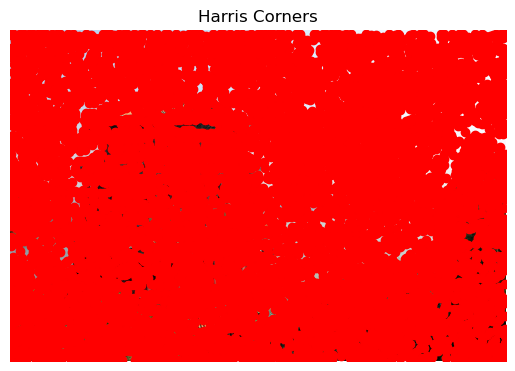

In [17]:
from sklearn.datasets import load_sample_images
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import corner_harris, corner_peaks
from skimage.color import rgb2gray

# Load sample images
dataset = load_sample_images()
img = dataset.images[0]

# Convert image to grayscale
gray_img = rgb2gray(img)

# Detect Harris corners
harris_response = corner_harris(gray_img)
harris_coords = corner_peaks(harris_response, min_distance=1)

# Extract x and y coordinates
y, x = np.transpose(harris_coords)

# Plot the image with Harris corners
plt.axis('off')
plt.imshow(img)
plt.plot(x, y, 'ro')
plt.title('Harris Corners')
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


           AA       AXP        BA       BAC       CAT
AA   1.000000  0.449811  0.376614  0.487971  0.513548
AXP  0.449811  1.000000  0.523343  0.668095  0.525392
BA   0.376614  0.523343  1.000000  0.475473  0.448104
BAC  0.487971  0.668095  0.475473  1.000000  0.566120
CAT  0.513548  0.525392  0.448104  0.566120  1.000000


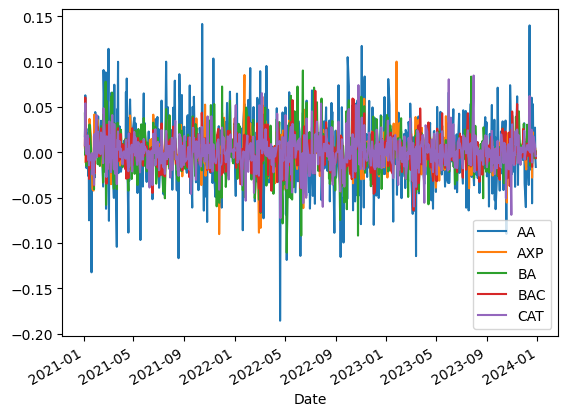

In [23]:
from __future__ import print_function
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf
import numpy as np

# 2011 to 2012
start = datetime(2021, 1, 1)
end = datetime(2024, 1, 1)

symbols = ["AA", "AXP", "BA", "BAC", "CAT"]

# Download historical data for the specified symbols
quotes = {symbol: yf.download(symbol, start=start, end=end) for symbol in symbols}

close = np.array([quotes[symbol]['Close'].values for symbol in symbols]).astype(np.float64)
dates = quotes[symbols[0]].index

data = {}

for i, symbol in enumerate(symbols):
    data[symbol] = np.diff(np.log(close[i]))

# Convert to DataFrame
df = pd.DataFrame(data, index=dates[:-1], columns=symbols)

print(df.corr())
df.plot()
plt.legend(symbols)
plt.show()



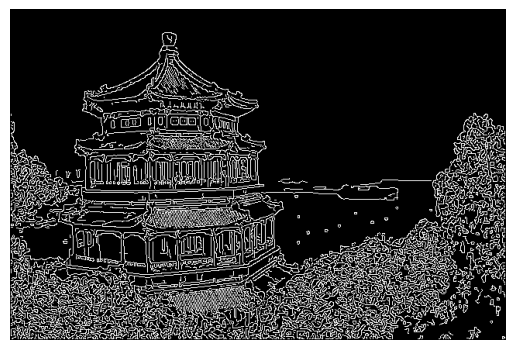

In [25]:
from sklearn.datasets import load_sample_images
import matplotlib.pyplot as plt
import skimage.feature
from skimage.color import rgb2gray

# Load sample images
dataset = load_sample_images()
img = dataset.images[0]

# Convert the image to grayscale
gray_img = rgb2gray(img)

# Apply the Canny edge detection algorithm
edges = skimage.feature.canny(gray_img)

# Plot the edges
plt.axis('off')
plt.imshow(edges, cmap='gray')
plt.show()


In [27]:
from __future__ import print_function
import statsmodels.api as sm

# Load the copper dataset
data = sm.datasets.copper.load_pandas()

# Extract the independent (exog) and dependent (endog) variables
x, y = data.exog, data.endog

# Add a constant to the independent variables matrix
x = sm.add_constant(x)

# Fit the OLS model
fit = sm.OLS(y, x).fit()

# Print the fit parameters
print("Fit params:", fit.params)
print()
print("Summary")
print()
print(fit.summary())


Fit params: const              283.955221
COPPERPRICE         15.043154
INCOMEINDEX       1442.885843
ALUMPRICE          -64.122980
INVENTORYINDEX    2450.384524
TIME               187.230713
dtype: float64

Summary

                            OLS Regression Results                            
Dep. Variable:       WORLDCONSUMPTION   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     171.0
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           4.11e-15
Time:                        16:39:48   Log-Likelihood:                -172.61
No. Observations:                  25   AIC:                             357.2
Df Residuals:                      19   BIC:                             364.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                   

In [33]:
from __future__ import print_function
import datetime
import numpy as np
import yfinance as yf
from scipy.stats import anderson

# Define the date range
start = datetime.datetime(2011, 1, 1)
end = datetime.datetime(2012, 1, 1)

# Download historical stock data
data = yf.download('AAPL', start=start, end=end)

# Extract the closing prices
close = data['Close'].values

# Ensure the close prices are float type
close = close.astype(float)
print("Shape of close prices:", close.shape)

# Perform the Anderson-Darling normality test on the log returns
log_returns = np.diff(np.log(close))
ad_result = anderson(log_returns)
print("Anderson-Darling statistic:", ad_result.statistic)
print("Critical values:", ad_result.critical_values)
print("Significance levels:", ad_result.significance_level)

print("Significance levels:", ad_result.significance_level)


[*********************100%%**********************]  1 of 1 completed

Shape of close prices: (252,)
Anderson-Darling statistic: 0.5722188912581032
Critical values: [0.567 0.646 0.775 0.904 1.075]
Significance levels: [15.  10.   5.   2.5  1. ]
Significance levels: [15.  10.   5.   2.5  1. ]


[*********************100%%**********************]  1 of 1 completed

                 Close
Date                  
2021-01-31  133.036842
2021-02-28  131.531579
2021-03-31  121.871304
2021-04-30  131.812858
2021-05-31  126.784000
2021-06-30  129.958636
2021-07-31  145.139524
2021-08-31  148.177727
2021-09-30  148.306190
2021-10-31  145.563809
2021-11-30  154.255716
2021-12-31  173.552727
2022-01-31  169.861500
2022-02-28  169.830001
2022-03-31  165.310435
2022-04-30  166.820999
2022-05-31  148.430477
2022-06-30  139.798573
2022-07-31  149.670499
2022-08-31  166.885218
2022-09-30  153.002856
2022-10-31  145.013333
2022-11-30  145.843331
2022-12-31  137.876666
2023-01-31  135.778999
2023-02-28  150.968421
2023-03-31  154.964782
2023-04-30  165.045790
2023-05-31  172.622728
2023-06-30  184.283333
2023-07-31  192.411501
2023-08-31  181.083913
2023-09-30  177.002501
2023-10-31  174.668638
2023-11-30  185.879523
2023-12-31  194.308501
2024-01-31  187.724284
2024-02-29  184.775500
2024-03-31  172.696500
2024-04-30  169.604545
2024-05-31  186.285909
2024-06-30 

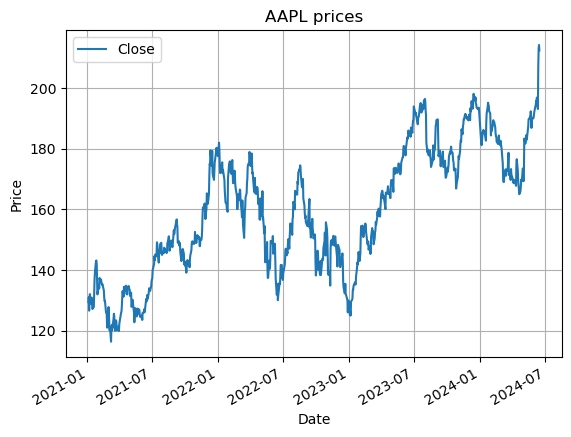

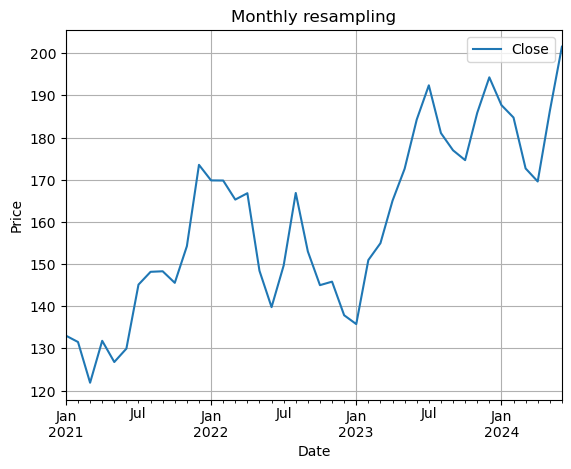

In [67]:
from __future__ import print_function
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import numpy as np

# Download AAPL data for 2011 to 2012
start = datetime(2021, 1, 1)
end = datetime(2024, 7, 1)

symbol = "AAPL"
data = yf.download(symbol, start=start, end=end)

# Ensure the data index is a DatetimeIndex
df = pd.DataFrame(data['Close'])
#print(df)
# Resample with monthly frequency and calculate mean, then forward-fill the missing values
resampled = df.resample('M').mean().ffill()
print(resampled)

# Plot
df.plot()
plt.title('AAPL prices')
plt.ylabel('Price')
plt.grid(True)

resampled.plot()
plt.title('Monthly resampling')
plt.ylabel('Price')
plt.grid(True)

plt.show()


In [53]:
from __future__ import print_function
from sklearn import datasets

# Load the California housing dataset
california_housing = datasets.fetch_california_housing()
print("Data shape", california_housing.data.shape)
print("Data max=%s min=%s" % (california_housing.data.max(), california_housing.data.min()))
print("Target shape", california_housing.target.shape)
print("Target max=%s min=%s" % (california_housing.target.max(), california_housing.target.min()))


Data shape (20640, 8)
Data max=35682.0 min=-124.35
Target shape (20640,)
Target max=5.00001 min=0.14999
